In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/temperature_historical_data.csv')
df.head()

,Jahr,Monat,Region,Temperatur
0,1881,1,Brandenburg/Berlin,-5.54
1,1882,1,Brandenburg/Berlin,1.43
2,1883,1,Brandenburg/Berlin,-0.41
3,1884,1,Brandenburg/Berlin,3.35
4,1885,1,Brandenburg/Berlin,-2.15


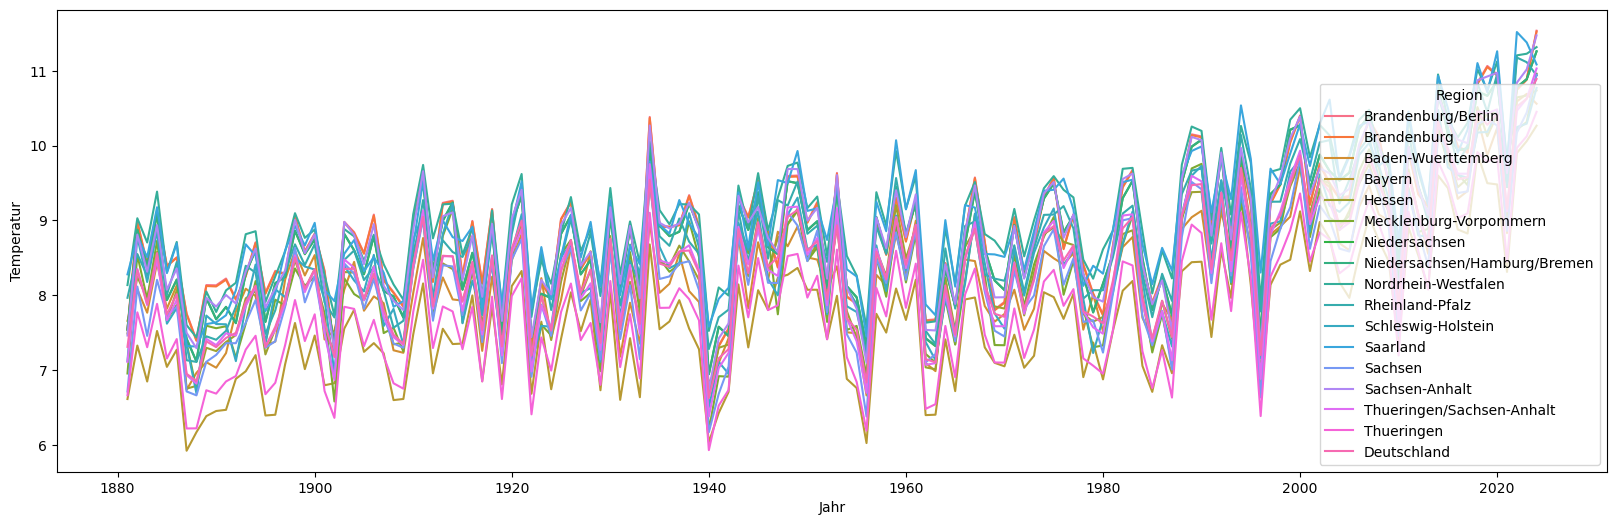

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
sns.lineplot(data=df.loc[(df.Jahr != 2025)], x='Jahr', y='Temperatur', hue='Region', errorbar=None);

In [4]:
df.Monat = df.Monat.astype('category')

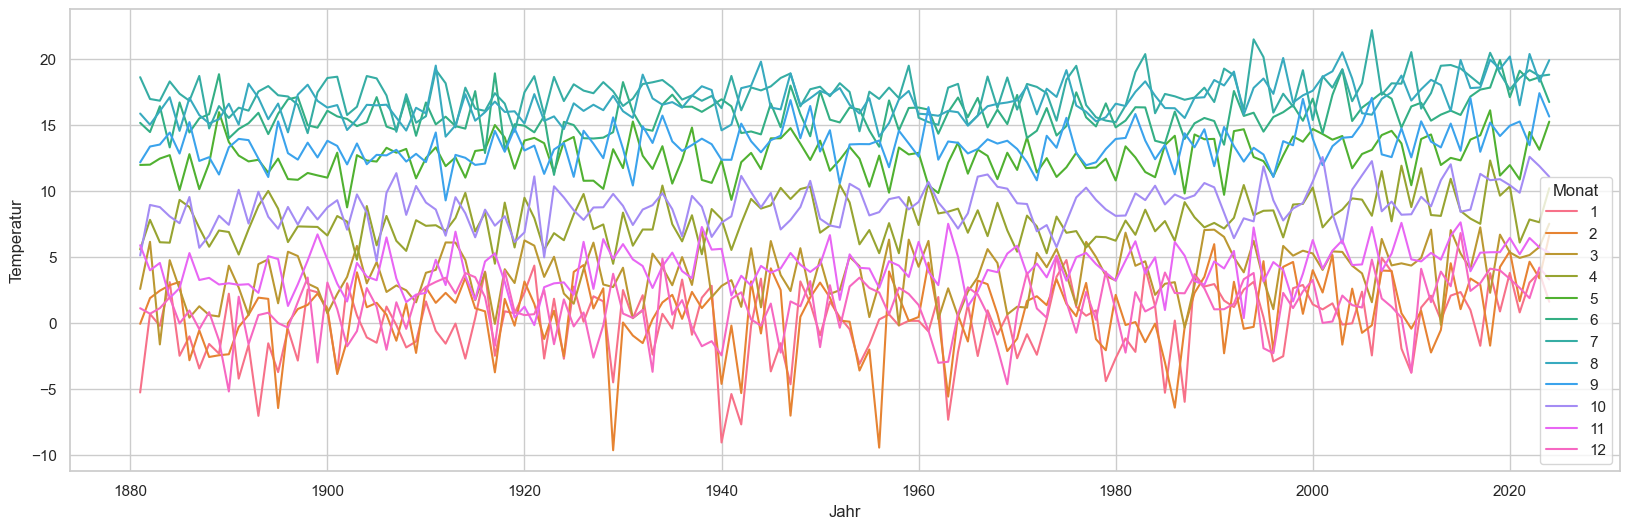

In [5]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.lineplot(data=df.loc[(df.Jahr != 2025)], x='Jahr', y='Temperatur', hue='Monat', errorbar=None);

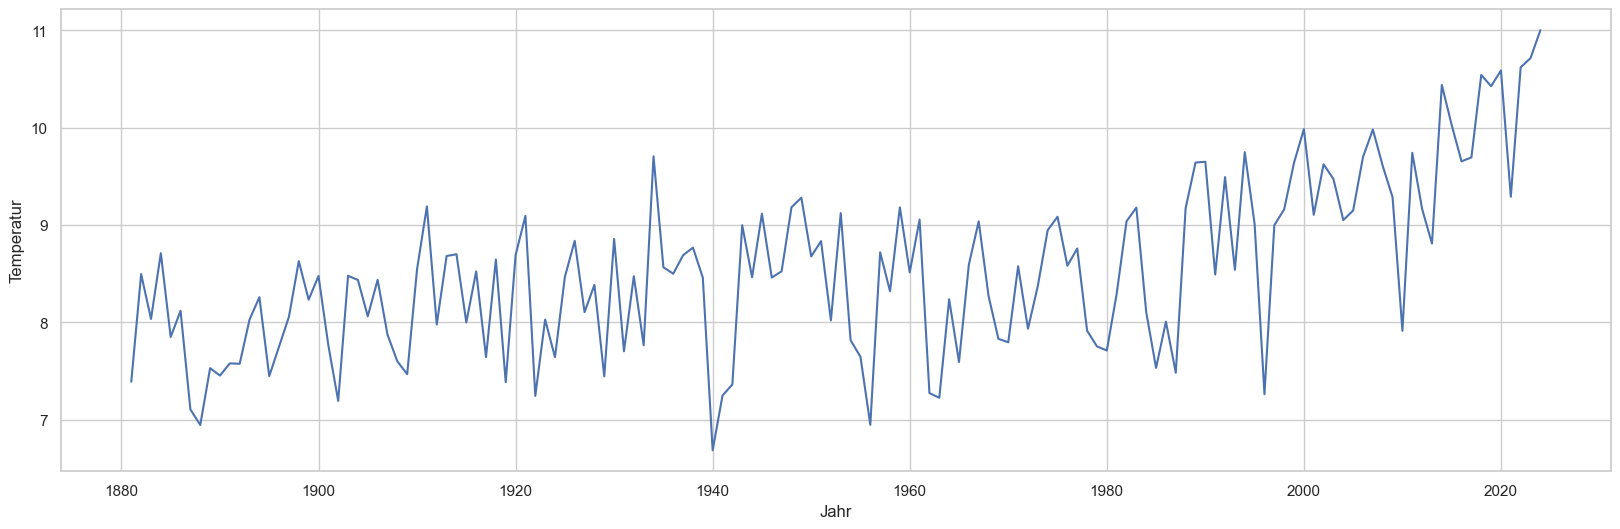

In [6]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df.loc[(df.Jahr != 2025)], x='Jahr', y='Temperatur', errorbar=None);

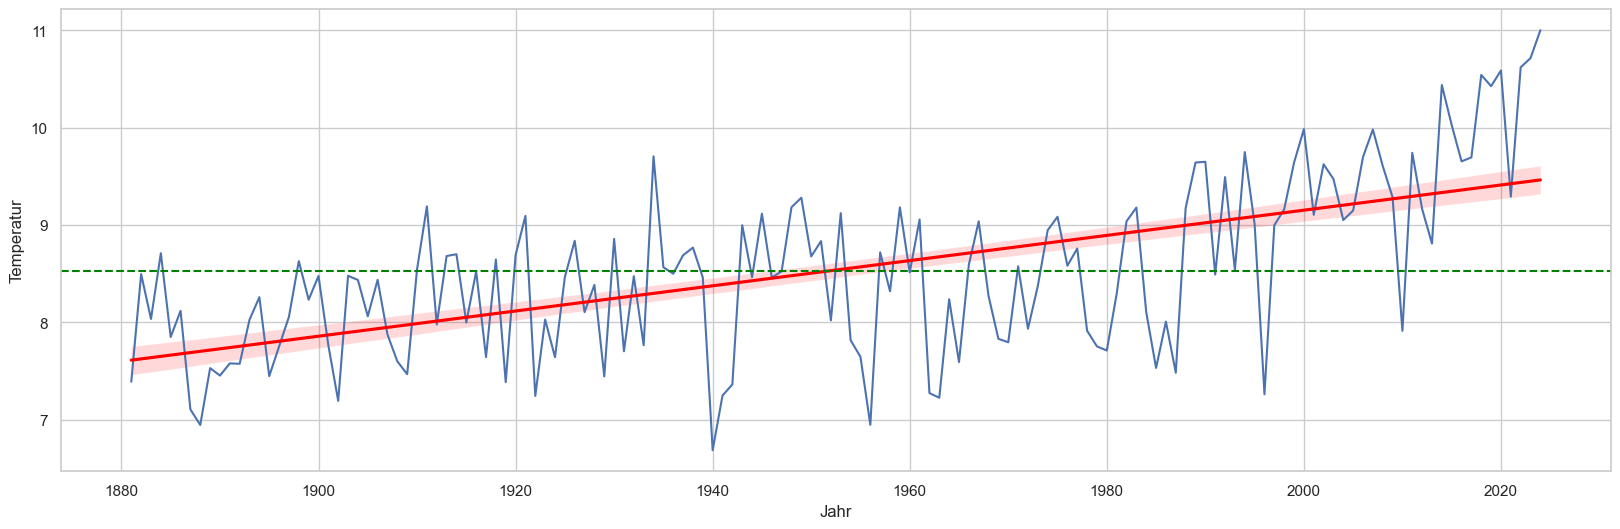

In [7]:
## add a trend line on the time plot of the average temperature
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.lineplot(data=df.loc[(df.Jahr != 2025)], x='Jahr', y='Temperatur', errorbar=None);
sns.regplot(data=df.loc[(df.Jahr != 2025)], x='Jahr', y='Temperatur', scatter=False, color='red');
plt.axhline(y=df.Temperatur.mean(), color='green', linestyle='--', label='Mean Temperature')
plt.show()

In [8]:
df_filtered = df.loc[(df.Jahr != 2025) & (df.Region != 'Deutschland')]

In [9]:
from statsmodels.api import OLS, add_constant
X = add_constant(df_filtered.Jahr)
y = df_filtered.Temperatur
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Temperatur   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     185.1
Date:                Wed, 28 May 2025   Prob (F-statistic):           5.08e-42
Time:                        23:31:37   Log-Likelihood:                -91294.
No. Observations:               27648   AIC:                         1.826e+05
Df Residuals:                   27646   BIC:                         1.826e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.7206      1.857     -9.002      0.0

In [10]:
X = df_filtered[['Jahr', 'Monat']]
X = add_constant(X)
y = df_filtered.Temperatur
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Temperatur   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     863.0
Date:                Wed, 28 May 2025   Prob (F-statistic):               0.00
Time:                        23:31:37   Log-Likelihood:                -90549.
No. Observations:               27648   AIC:                         1.811e+05
Df Residuals:                   27645   BIC:                         1.811e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.5557      1.810    -10.807      0.0

In [11]:
df.Region.unique()

array(['Brandenburg/Berlin', 'Brandenburg', 'Baden-Wuerttemberg',
       'Bayern', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Niedersachsen/Hamburg/Bremen', 'Nordrhein-Westfalen',
       'Rheinland-Pfalz', 'Schleswig-Holstein', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Thueringen/Sachsen-Anhalt', 'Thueringen',
       'Deutschland'], dtype=object)